In [108]:
import pandas as pd
FREQKH=25
'''need to set or CHECK mysstate size this from data'''

cell=8
file=f'/Users/richardbarrett-jolley/Dropbox/Sean/Sean Cell attached Kir6.1 data/cell{cell}idl.csv'
'''need to skip several potential rows of header!'''
skip=0
df=pd.read_csv(file,header=None, names=['t','level'],delimiter=',', index_col=False,skiprows=skip)
'''with open(file,'rt') as filein:
    row=float(filein.readline().strip)'''
print(df[1:10])    
time=df.loc[:,"t"].to_numpy()
data=df.loc[:,"level"].to_numpy()
mystate=max(data)
print(time[1:20])
print(data[1:100])
print(len(data))

         t   level
1  0.00020   5.849
2  0.00744   3.691
3  0.00024   5.849
4  0.00900   3.691
5  0.00016   9.569
6  0.00064   3.691
7  0.00036  15.423
8  0.00216   3.691
9  0.00020   5.849
[0.0002  0.00744 0.00024 0.009   0.00016 0.00064 0.00036 0.00216 0.0002
 0.00948 0.00016 0.00028 0.0068  0.00048 0.00012 0.0026  0.01708 0.00028
 0.08108]
[ 5.849  3.691  5.849  3.691  9.569  3.691 15.423  3.691  5.849  3.691
  9.569  5.849  3.691 15.423  3.691 15.423  3.691  9.569  3.691  9.569
 15.423  3.691 15.423  3.691  9.569  3.691 15.423  3.691 15.423  3.691
  5.849  9.569  3.691  5.849  3.691 15.423  3.691  9.569  3.691  5.849
  3.691  5.849  3.691 15.423  3.691  5.849  3.691  5.849  9.569  3.691
  5.849  3.691  5.849  3.691 15.423  3.691 15.423  3.691 15.423  3.691
 15.423  3.691 15.423  3.691  5.849  3.691  9.569  3.691 15.423  3.691
 15.423  3.691  9.569 15.423  9.569  3.691 15.423  3.691  5.849  3.691
  9.569  3.691 15.423  3.691 15.423  9.569 15.423  9.569 15.423  3.691
 15.423  3.691  

In [109]:
si=1/(1000*FREQKH)
print(f'mystate is {mystate}pA')

mystate is 15.423pA


In [110]:
def extendtime(si,time):
    return [1]*int(time/si)

output=[]
for count, val in enumerate(time):
    newdata=extendtime(si,val)
    if data[count]==mystate:
        newdata=[1 for i in newdata]
    else:
        newdata=[0 for i in newdata]
        
    output.extend(newdata)
print(f'total outout len = {len(output)} but mystate length = {sum(output)}')

total outout len = 8066370 but mystate length = 2074455


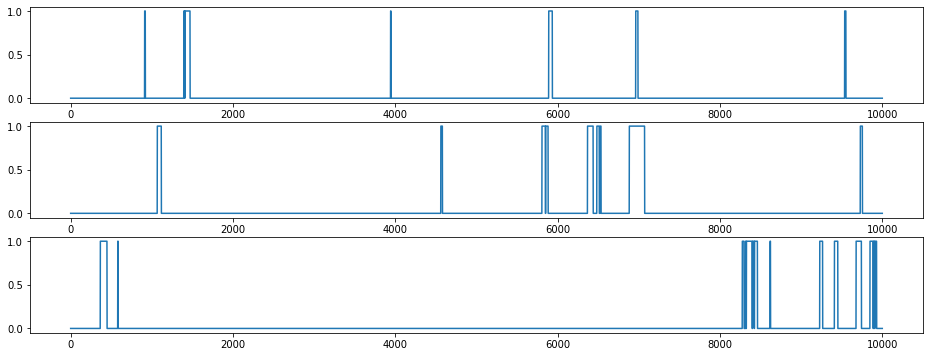

In [111]:
from matplotlib import pyplot as plt
length=10000
plt.figure(figsize=(16, 6))
plt.subplot(311)
plt.plot(output[0:length])
plt.subplot(312)
plt.plot(output[length:2*length])
plt.subplot(313)
plt.plot(output[2*length:3*length])

In [112]:
df=pd.DataFrame(data=output)
df.to_csv(f'/Users/richardbarrett-jolley/Dropbox/Sean/Sean Cell attached Kir6.1 data/cell{cell}RECON10.txt',index=False,header=False)